# Computer Vision Nanodegree


In [1]:
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms

transform_test = transforms.Compose([transforms.Resize((224, 224)), \
                                     transforms.ToTensor(), \
                                     transforms.Normalize((0.485, 0.456, 0.406), \
                                                          (0.229, 0.224, 0.225))])


data_loader = get_loader(transform=transform_test,    
                         mode='test')

Vocabulary successfully loaded from vocab.pkl file!


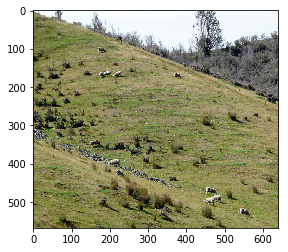

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
images, captions = next(iter(data_loader))
plt.imshow(np.squeeze(images))

Run the code cell below to visualize an example test image, before pre-processing is applied.

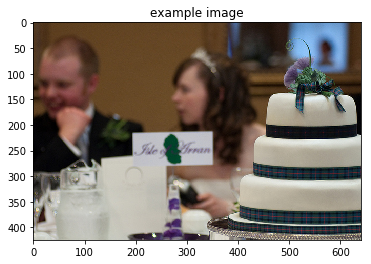

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

In [19]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
device

device(type='cuda')

In [51]:
# Watch for any changes in model.py, and re-load it automatically.
% load_ext autoreload
% autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

encoder_file = 'encoder-9.pkl'  
decoder_file = 'decoder-9.pkl'

embed_size = 512
hidden_size = 512

vocab_size = len(data_loader.dataset.vocab)

encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

encoder.to(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, ker

In [52]:
decoder.to(device)

DecoderRNN(
  (embed): Embedding(9955, 512)
  (lstm): LSTM(512, 512, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=512, out_features=9955, bias=True)
  (softmax): LogSoftmax()
)

In [53]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)
print("image.shape: ", image.shape)
# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)
print("features.shape: ", features.shape)
print()

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

image.shape:  torch.Size([1, 3, 224, 224])
features.shape:  torch.Size([1, 1, 512])

example output: [0, 3, 91, 224, 111, 3, 112, 21, 3, 821, 13, 109, 18, 1, 18, 1, 18, 1, 18, 1]


In [54]:
def clean_sentence(output):
    sentence = []
    for i in range(len(output)):        
        word = data_loader.dataset.vocab.idx2word[output[i]]
        if word == data_loader.dataset.vocab.end_word:
            break
        if word != data_loader.dataset.vocab.start_word:
            sentence.append(word)
    sentence = " ".join(sentence)
    sentence = sentence.capitalize()
    return sentence


In [55]:
sentence = clean_sentence(output)
print('example sentence:', sentence)

assert type(sentence)==str, 'Sentence needs to be a Python string!'

example sentence: A woman sitting at a table with a plate of food .


##  Generate Predictions!

In [56]:
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

Run the code cell below (multiple times, if you like!) to test how this function works.

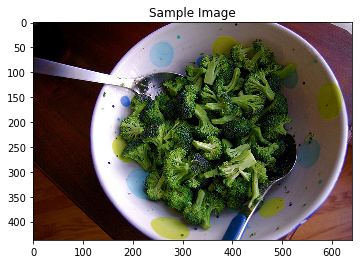

A plate of food with broccoli and carrots .


In [62]:
get_prediction()

As the last task in this project, you will loop over the images until you find four image-caption pairs of interest:
- Two should include image-caption pairs that show instances when the model performed well.
- Two should highlight image-caption pairs that highlight instances where the model did not perform well.

Use the four code cells below to complete this task.

### The model performed well!


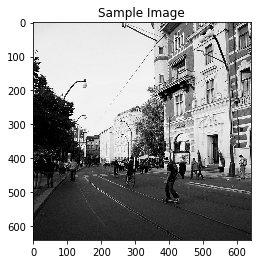

A city street with a traffic light and a street sign .


In [63]:
get_prediction()

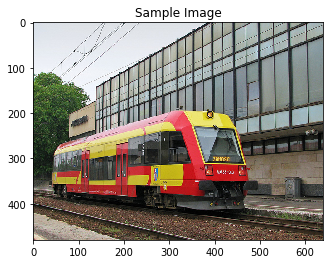

A train is traveling down the tracks near a train station .


In [64]:
get_prediction()

### The model could have performed better ...


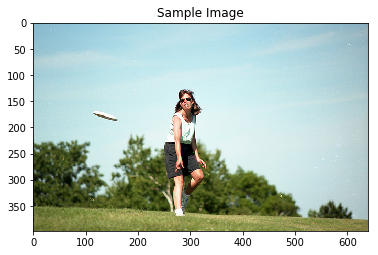

A man is throwing a frisbee in a field .


In [65]:
get_prediction()

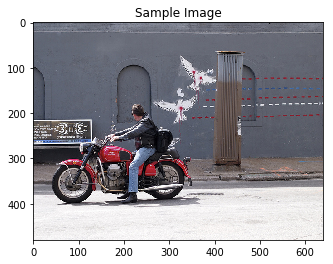

A man riding a motorcycle down a street .


In [66]:
get_prediction()